In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,matthews_corrcoef,recall_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [85]:
data=pd.read_csv(r"C:\Users\Theenesh\Downloads\Heart_Disease .csv")

In [86]:
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [87]:
data.tail()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diseased
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [88]:
data.isnull().sum()

age         0
sex         0
cp          0
restbp      0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Diseased    0
dtype: int64

In [89]:
data['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [90]:
data.isnull().sum()

age         0
sex         0
cp          0
restbp      0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Diseased    0
dtype: int64

In [91]:
data.replace('?',np.nan,inplace=True)

In [92]:
modethal=data['thal'].mode()[0]
modeca=data['ca'].mode()[0]

In [93]:
data['thal'].fillna(modethal,inplace=True)
data['ca'].fillna(modeca,inplace=True)

C:\Users\Theenesh\AppData\Local\Temp\ipykernel_2968\3910838252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['thal'].fillna(modethal,inplace=True)
C:\Users\Theenesh\AppData\Local\Temp\ipykernel_2968\3910838252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [94]:
data.isnull().sum()

age         0
sex         0
cp          0
restbp      0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
Diseased    0
dtype: int64

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   restbp    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  Diseased  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [96]:
data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,Diseased
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [97]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [99]:
rfclassifier=RandomForestClassifier(n_estimators=10000,random_state=42)

In [100]:
rfclassifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10000, random_state=42)

In [101]:
y_pred=rfclassifier.predict(x_test)
y_pred_proba = rfclassifier.predict_proba(x_test)[:, 1]

In [102]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MCC: {mcc:.4f}")

Accuracy: 0.8852
Precision: 0.9310
Recall: 0.8438
F1-Score: 0.8852
AUC: 0.9440
MCC: 0.7748


In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
paramgrid={
    'n_estimators':np.arange(10,200,10)    
}

rfclassifier=RandomForestClassifier(random_state=42)
randomsearch=RandomizedSearchCV(estimator=rfclassifier, param_distributions=paramgrid,n_iter=10,cv=5)
randomsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])})

In [105]:
print(f"Best n_estimators: {randomsearch.best_params_['n_estimators']}")
print(f"Best Accuracy: {randomsearch.best_score_:.4f}")

Best n_estimators: 30
Best Accuracy: 0.8180


In [120]:
#rfclassifier.fit(x_train, y_train)
importance = rfclassifier.feature_importances_
feature_names = data.columns[:-1]  
feature_importances = pd.DataFrame({
    'Features': feature_names,
    'Importance': importance
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


   Features  Importance
2        cp    0.127280
7   thalach    0.116200
9   oldpeak    0.113342
11       ca    0.112550
0       age    0.105167
12     thal    0.095484
4      chol    0.079107
3    restbp    0.074830
10    slope    0.055162
8     exang    0.051821
1       sex    0.035816
6   restecg    0.021773
5       fbs    0.011468


In [121]:
feature_importances.head()

,Features,Importance
2,cp,0.127280
7,thalach,0.116200
9,oldpeak,0.113342
11,ca,0.112550
0,age,0.105167


In [122]:
feature_importances.tail()

,Features,Importance
10,slope,0.055162
8,exang,0.051821
1,sex,0.035816
6,restecg,0.021773
5,fbs,0.011468


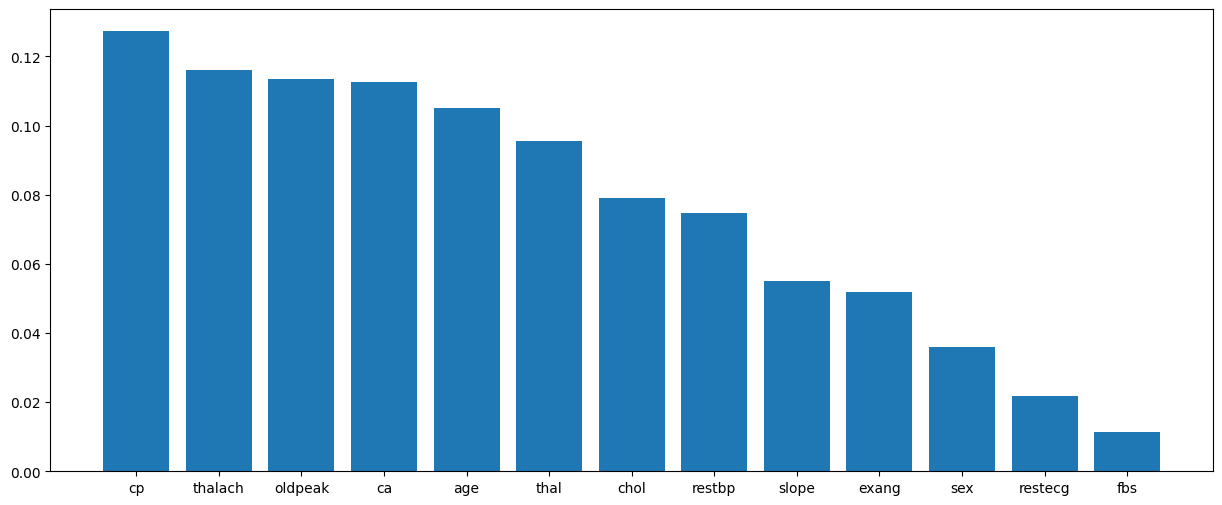

In [128]:
plt.figure(figsize=(15,6))
plt.bar(feature_importances['Features'],feature_importances['Importance'])
plt.show()

In [131]:
xx = data.iloc[:, :-1].values 
yy = data.iloc[:, -1].values
rf_classifier = RandomForestClassifier(n_estimators=10000, oob_score=True,random_state=42)
rf_classifier.fit(xx, yy)
oob_score = rf_classifier.oob_score_
print(f"OOB Score:{oob_score:.4f}")

OOB Score:0.8416


n_estimators: 10, Accuracy: 0.8525
n_estimators: 50, Accuracy: 0.8852
n_estimators: 100, Accuracy: 0.8689
n_estimators: 150, Accuracy: 0.8689
n_estimators: 200, Accuracy: 0.8525


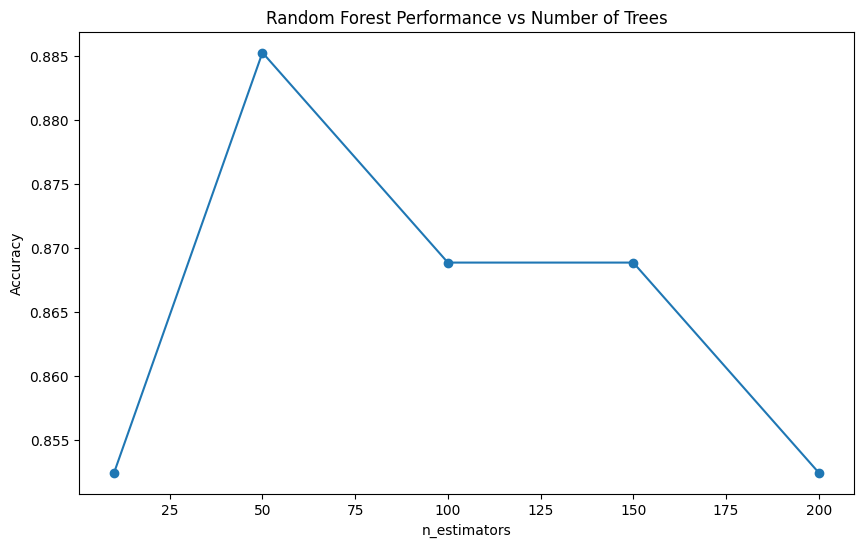

In [145]:
n_estimators_range = [10, 50, 100, 150, 200]
results = {}
for n in n_estimators_range:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[n] = accuracy

for n, accuracy in results.items():
    print(f"n_estimators: {n}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()),marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs Number of Trees')
#plt.grid(True)
plt.show()